<html><h1><center style="color:blue">Applying Machine Learning Models</center></h1></html>


In [17]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


<html><h1><p style="color:#5dbcd2">Loading Data from File</p></h1></html>


In [3]:
train = pd.read_csv('UCI HAR dataset/csv_files/train.csv')
test = pd.read_csv('UCI HAR dataset/csv_files/test.csv')
print(train.shape, test.shape)


(7352, 564) (2947, 564)


In [4]:
train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


### Making Data for Model


In [5]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))


X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


<html><h1><p style="color:#44bcd8">Let's start modeling with our Dataset</p></h1></html>


#### Labels that are useful in plotting confusion matrix


In [6]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']


#### Let's make a function to plot the confusion matrix


In [7]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#### Let's make a function to run any model specified


In [8]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

#### Make function to print the gridsearch Parameters


In [9]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

    

<html><h1><p style="color:red">1. Logistic Regression with Grid Search</p></h1></html>


training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:07.957317

Predicting test data
Done....!

==> testing time:- 0:00:00.008926

==> Accuracy:- 0.9586019681031558


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 405  11]
 [  0   0   0  27   1 443]]


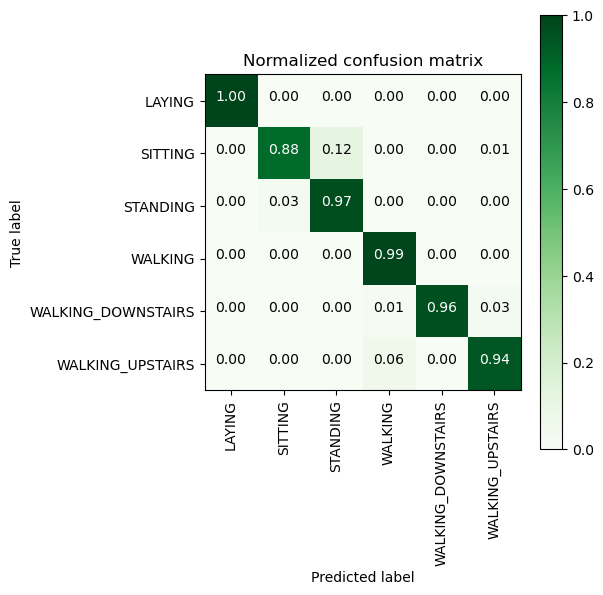

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LogisticRegression(C=1)


==> Best parameters:
	Parameters of best estimator : {'C': 1, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.937297562843987


In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])


<html><h1><p style="color:red">2. SVM with GridSearch</p></h1></html>


training the model..
Done....!

==> training time:- 0:01:40.469605

Predicting test data
Done....!

==> testing time:- 0:00:00.366817

==> Accuracy:- 0.9630132337970818


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 440  49   0   0   2]
 [  0  13 519   0   0   0]
 [  0   0   0 488   4   4]
 [  0   0   0   3 403  14]
 [  0   0   0  19   1 451]]


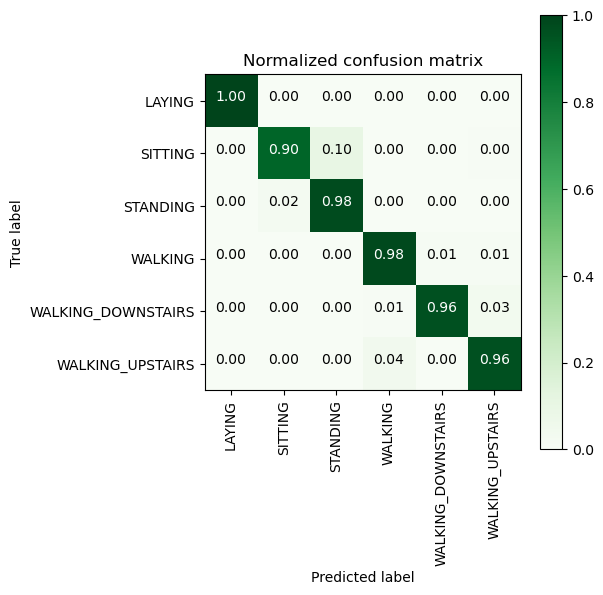

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	SVC(C=10, kernel='poly')


==> Best parameters:
	Parameters of best estimator : {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9447840101370255


In [12]:
parameters = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf']}
svm = SVC()
svm_grid = GridSearchCV(svm,param_grid=parameters, n_jobs=-1)
svm_grid_results = perform_model(svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(svm_grid_results['model'])


<html><h1><p style="color:red">3. Decision Trees with GridSearchCV</p></h1></html>


training the model..
Done....!

==> training time:- 0:00:12.466456

Predicting test data
Done....!

==> testing time:- 0:00:00.005333

==> Accuracy:- 0.8639294197488971


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  14 345  61]
 [  0   0   0  78  24 369]]


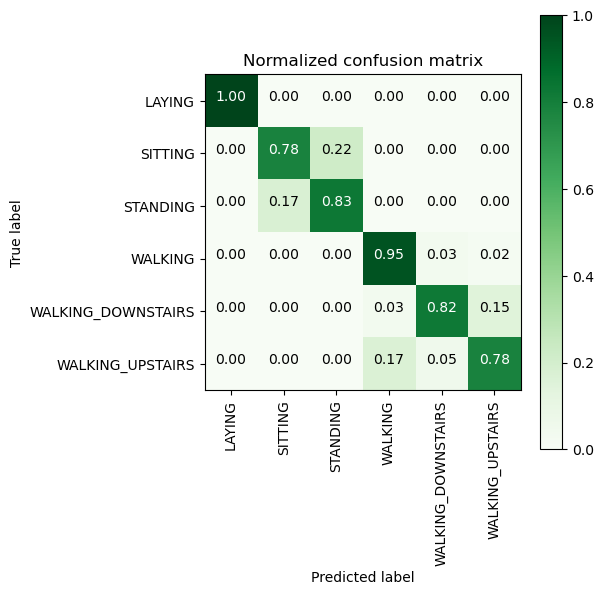

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



==> Best Estimator:
	DecisionTreeClassifier(max_depth=7)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 7}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8492989636371202


In [13]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(dt_grid_results['model'])


<html><h1><p style="color:red">4. Random Forest Classifier with GridSearch</p></h1></html>


training the model..
Done....!

==> training time:- 0:06:58.886516

Predicting test data
Done....!

==> testing time:- 0:00:00.016562

==> Accuracy:- 0.9195792331184255


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 432  59   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 475   7  14]
 [  0   0   0  21 354  45]
 [  0   0   0  43   8 420]]


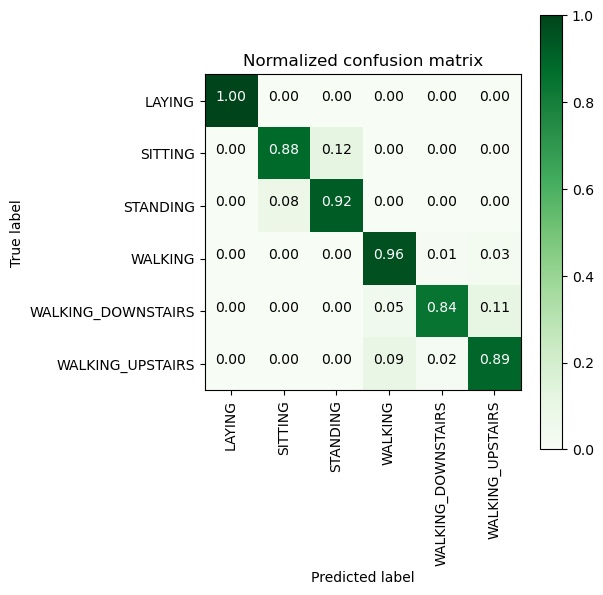

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.88      0.90       491
          STANDING       0.89      0.92      0.91       532
           WALKING       0.88      0.96      0.92       496
WALKING_DOWNSTAIRS       0.96      0.84      0.90       420
  WALKING_UPSTAIRS       0.88      0.89      0.88       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=70)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 70}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9212504797976294


In [14]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])


<html><h1><p style="color:red">5. K-Nearest Neighbours Classifier with GridSearch</p></h1></html>


training the model..
Done....!

==> training time:- 0:00:03.551694

Predicting test data
Done....!

==> testing time:- 0:00:00.782942

==> Accuracy:- 0.9022734984730234


 ********Confusion Matrix********

 [[534   2   1   0   0   0]
 [  0 394  93   0   0   4]
 [  0  35 497   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  48 333  39]
 [  0   0   0  42  10 419]]


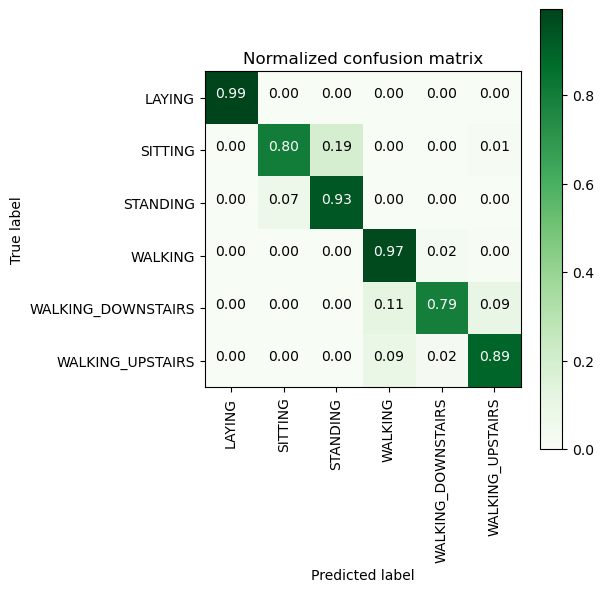

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       537
           SITTING       0.91      0.80      0.85       491
          STANDING       0.84      0.93      0.89       532
           WALKING       0.84      0.97      0.90       496
WALKING_DOWNSTAIRS       0.94      0.79      0.86       420
  WALKING_UPSTAIRS       0.90      0.89      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947



==> Best Estimator:
	KNeighborsClassifier(n_neighbors=7)


==> Best parameters:
	Parameters of best estimator : {'n_neighbors': 7}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8998955775376091


In [15]:
parameters = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,param_grid=parameters, n_jobs=-1)
knn_grid_results = perform_model(knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(knn_grid_results['model'])


<html><h1><p style="color:red">6. XGBoost With GridSearch</p></h1></html>


training the model..
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Done....!

==> training time:- 0:08:26.345452

Predicting test data
Done....!

==> testing time:- 0:00:00.164494

==> Accuracy:- 0.9504580929759077


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 429  60   0   0   2]
 [  0  23 509   0   0   0]
 [  0   0   0 492   0   4]
 [  0   0   0   6 395  19]
 [  0   0   0  27   5 439]]


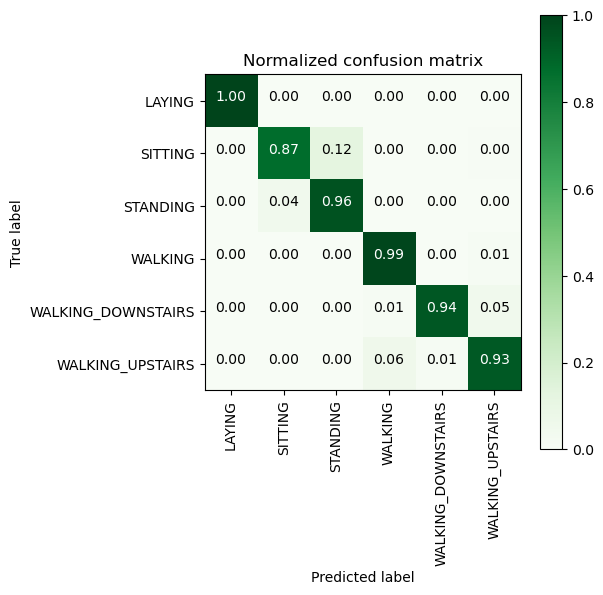

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.95      0.87      0.91       491
           2       0.89      0.96      0.92       532
           3       0.94      0.99      0.96       496
           4       0.99      0.94      0.96       420
           5       0.95      0.93      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



==> Best Estimator:
	XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constra

In [19]:
# Encode labels in y_train and y_test to integer values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid=xgb_params, n_jobs=-1, verbose=1, cv=3)
xgb_grid_results = perform_model(xgb_grid, X_train, y_train_encoded, X_test, y_test_encoded, class_labels=labels)

print_grid_search_attributes(xgb_grid_results['model'])


<html><h1><p style="color:red">7. Comparing all models</p></h1></html>


In [22]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression     : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('SVC                     : {:.04}%       {:.04}% '.format(svm_grid_results['accuracy'] * 100,\
                                                        100-(svm_grid_results['accuracy'] * 100)))

print('DecisionTree            : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest           : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))

print('K-Nearest Neighbours    : {:.04}%      {:.04}% '.format(knn_grid_results['accuracy'] * 100,\
                                                           100-(knn_grid_results['accuracy'] * 100)))

print('XGBoost                 : {:.04}%      {:.04}% '.format(xgb_grid_results['accuracy'] * 100,\
                                                           100-(xgb_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression     : 95.86%       4.14%
SVC                     : 96.3%       3.699% 
DecisionTree            : 86.39%      13.61% 
Random Forest           : 91.96%      8.042% 
K-Nearest Neighbours    : 90.23%      9.773% 
XGBoost                 : 95.05%      4.954% 


- We can clearly choose here <html><p style="color:green">**_SVC_**</p></html> with params = {'C': 10, 'gamma': 'scale', 'kernel': 'poly'} Or <html><p style="color:green">**_Logistic Regression_**</p></html>with params = {'C': 1, 'penalty': 'l2'} Or <html><p style="color:green">**_XGBoost_**</p></html> with params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200} as our ML Model.


<html><h1><p style="color:blue">8. Permutation Importance</p></h1></html>



Calculating Permutation Importance...

Permutation Importance of Features:
                           Feature  Importance
182      tBodyGyroJerk-entropy()-X    0.081778
445          fBodyGyro-entropy()-X    0.051239
287           fBodyAcc-entropy()-X    0.016966
41            tGravityAcc-mean()-Y    0.009841
523  fBodyBodyAccJerkMag-entropy()    0.009026
53             tGravityAcc-min()-Y    0.008415
50             tGravityAcc-max()-Y    0.007737
183      tBodyGyroJerk-entropy()-Y    0.005904
454         fBodyGyro-skewness()-X    0.005836


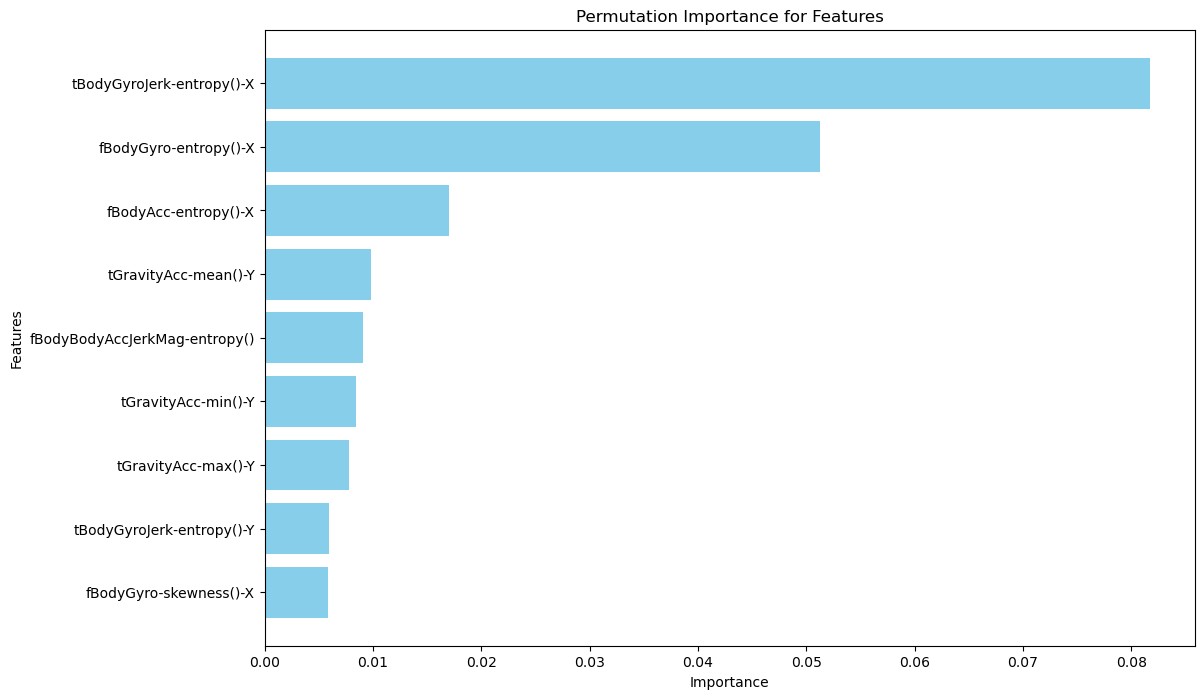

In [24]:
from sklearn.inspection import permutation_importance

# Choose the best model(SVC)
best_model = svm_grid_results['model'].best_estimator_

# Calculate permutation importance
print("\nCalculating Permutation Importance...")
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=5, n_jobs=-1, random_state=42)

# Store the importance values
feature_importances = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean,
}).sort_values(by="Importance", ascending=False)

# Display the feature importance
print("\nPermutation Importance of Features:")
print(feature_importances.head(9))

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importances["Feature"].head(9), feature_importances["Importance"].head(9), color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Permutation Importance for Features")
plt.gca().invert_yaxis()
plt.show()
